instructions:

above is the code for extracting the embeddings for the documents. those embeddings are already saved in './data'. And you don't need to regenerate it again (it's time consuming).

you can read the csv file directly to get the embeddings and train it for the models. (I also run the logistic regression and the results are shown above, you can try it to make sure the embedding is good.)

The model you can try with this embedding is logistic regression, NN(recommend this), random forest/decision tree and ensemble models. This already embedded one cannot run Naive Bayes.

In [9]:
import numpy as np
import torch
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing [CLS] and average embeddings generated from BERT
!unzip /content/drive/MyDrive/Colab_Notebooks/CIS520/Project/data.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/CIS520/Project/data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/cls_embedding_dev.csv  
  inflating: __MACOSX/data/._cls_embedding_dev.csv  
  inflating: data/avg_embedding_test.csv  
  inflating: data/gold_test.csv      
  inflating: data/avg_embedding_train.csv  

In [ ]:
avg_emb_train = torch.Tensor(np.genfromtxt('data/avg_embedding_train.csv', delimiter=','))
avg_emb_dev = torch.Tensor(np.genfromtxt('data/avg_embedding_dev.csv', delimiter=','))
avg_emb_test = torch.Tensor(np.genfromtxt('data/avg_embedding_test.csv', delimiter=','))
print('avg_emb_train shape', avg_emb_train.shape)
print('avg_emb_dev shape', avg_emb_dev.shape)
print('avg_emb_test shape', avg_emb_test.shape)

avg_emb_train shape torch.Size([20000, 768])
avg_emb_dev shape torch.Size([5000, 768])
avg_emb_test shape torch.Size([25000, 768])


In [ ]:
cls_emb_train = torch.Tensor(np.genfromtxt('data/cls_embedding_train.csv', delimiter=','))
cls_emb_dev = torch.Tensor(np.genfromtxt('data/cls_embedding_dev.csv', delimiter=','))
cls_emb_test = torch.Tensor(np.genfromtxt('data/cls_embedding_test.csv', delimiter=','))
print('cls_emb_train shape', cls_emb_train.shape)
print('cls_emb_dev shape', cls_emb_dev.shape)
print('cls_emb_test shape', cls_emb_test.shape)

cls_emb_train shape torch.Size([20000, 768])
cls_emb_dev shape torch.Size([5000, 768])
cls_emb_test shape torch.Size([25000, 768])


In [ ]:
gold_train = torch.Tensor(np.genfromtxt('data/gold_train.csv', delimiter=',').reshape(-1,1))
gold_dev = torch.Tensor(np.genfromtxt('data/gold_dev.csv', delimiter=',').reshape(-1,1))
gold_test = torch.Tensor(np.genfromtxt('data/gold_test.csv', delimiter=',').reshape(-1,1))
print('gold_train shape', gold_train.shape)
print('gold_dev shape', gold_dev.shape)
print('gold_test shape', gold_test.shape)

gold_train shape torch.Size([20000, 1])
gold_dev shape torch.Size([5000, 1])
gold_test shape torch.Size([25000, 1])


In [10]:
#Logistic Regression and SVM classifiers training function definitions

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

def LogisticRegressionScikit(X_train, y_train):
    clf_log = LogisticRegression(max_iter=500)
    clf_log.fit(X_train, y_train)
    return clf_log

def SVMScikit(X_train, y_train):
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    return clf

def PredSKLearn(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_pred, y_test)    
    return y_pred, score

In [11]:
#Logistic Regression on both [CLS] and avg embeddings
clf_log_avg = LogisticRegressionScikit(avg_emb_train, gold_train.reshape(-1))
clf_log_cls = LogisticRegressionScikit(cls_emb_train, gold_train.reshape(-1))
y_pred_avg_log, avg_log_acc_scikit = PredSKLearn(clf_log_avg, avg_emb_test, gold_test.reshape(-1))
y_pred_cls_log, cls_log_acc_scikit = PredSKLearn(clf_log_cls, cls_emb_test, gold_test.reshape(-1))
print('Accuracy of logistic regression classifier on avg_emb_test set: {:.2f} %'.format(avg_log_acc_scikit*100))
print('Accuracy of logistic regression classifier on cls_emb_test set: {:.2f} %'.format(cls_log_acc_scikit*100))

Accuracy of logistic regression classifier on avg_emb_test set: 85.36 %
Accuracy of logistic regression classifier on cls_emb_test set: 84.42 %


In [12]:
#SVM on both [CLS] and avg embeddings

clf_svm_avg = SVMScikit(avg_emb_train, gold_train.reshape(-1))
clf_svm_cls = SVMScikit(cls_emb_train, gold_train.reshape(-1))
y_pred_avg_svm, avg_svm_acc_scikit = PredSKLearn(clf_svm_avg, avg_emb_test, gold_test.reshape(-1))
y_pred_cls_svm, cls_svm_acc_scikit = PredSKLearn(clf_svm_cls, cls_emb_test, gold_test.reshape(-1))
print('Accuracy of SVM classifier on avg_emb_test set: {:.2f} %'.format(avg_svm_acc_scikit*100))
print('Accuracy of SVM classifier on avg_emb_test set: {:.2f} %'.format(cls_svm_acc_scikit*100))

Accuracy of SVM classifier on avg_emb_test set: 84.78 %
Accuracy of SVM classifier on avg_emb_test set: 83.68 %


In [ ]:
#Random Forest is performing so poorly, skipping it

# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier

# def RandomForestScikit(X_train, y_train, X_test, y_test):
#     clf = RandomForestClassifier(random_state=25,
#                                 n_jobs=10,
#                                 class_weight="balanced",
#                                 n_estimators=250)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     score = accuracy_score(y_pred, y_test)    
#     return y_pred, score

In [ ]:
# y_pred_scikit, avg_rf_acc_scikit = RandomForestScikit(avg_emb_train, gold_train.reshape(-1), avg_emb_test, gold_test.reshape(-1))
# print('Accuracy of random forest classifier on avg_emb_test set: {:.2f} %'.format(avg_rf_acc_scikit*100))

In [ ]:
# y_pred_scikit, cls_rf_acc_scikit = RandomForestScikit(cls_emb_train, gold_train.reshape(-1), cls_emb_test, gold_test.reshape(-1))
# print('Accuracy of random forest classifier on cls_emb_test set: {:.2f} %'.format(cls_rf_acc_scikit*100))

In [13]:
#Custom class for dataset
from torch.utils.data.dataset import Dataset
class MyDataset(Dataset):
    def __init__(self,d):
        self.text = d['text']
        self.label = d['label']
        
    def __getitem__(self, index):
        x = self.text[index]
        y = self.label[index]        
        return {'text': x, 'label': y}
    
    def __len__(self):
        return len(self.text)

In [14]:
#Forming training and test set dataloaders for both [CLS] and avg embeddings
from torch.utils.data.dataloader import DataLoader

avgtrainingset={'text':avg_emb_train,'label':gold_train}
avgtrainloader=DataLoader(MyDataset(avgtrainingset), batch_size=100, shuffle=True)

avgtestset={'text':avg_emb_test,'label':gold_test}
avgtestloader=DataLoader(MyDataset(avgtestset), batch_size=100, shuffle=True)

clstrainingset={'text':cls_emb_train,'label':gold_train}
clstrainloader=DataLoader(MyDataset(clstrainingset), batch_size=100, shuffle=True)

clstestset={'text':cls_emb_test,'label':gold_test}
clstestloader=DataLoader(MyDataset(clstestset), batch_size=100, shuffle=True)

In [15]:
#Shallow Neural Net architecture
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input format(1,768)
        self.in_layer = nn.Linear(768, 128)
        #self.bn1 = nn.BatchNorm2d(100)
        #self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(128, 32)           #self.fc2 = nn.Linear(256, 64)
        #self.fc3 = nn.Linear(64, 16)
        self.dp = nn.Dropout2d(p=0.5)
        self.out_layer = nn.Linear(32, 2)

    def forward(self, x):
        x=F.relu(self.in_layer(x))
        #x=self.bn1(F.relu(self.in_layer(x)))
#        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
#        x=F.relu(self.fc3(x))
        output=self.out_layer(x)

        return output

In [16]:
criterion = nn.CrossEntropyLoss()

In [22]:
import torch.optim as optim
avgnet = Net()
avgoptimizer = optim.Adam(avgnet.parameters(), lr=0.001)

In [18]:
correct = 0
total = 0

with torch.no_grad():
    for i, batch in enumerate(avgtestloader,0):
        inputs = batch['text']
        labels = batch['label']
        outputs = avgnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.reshape(-1)).sum()

print(correct)
print(total)
print('Accuracy of the network for avg_emb_test before training: %.2f %%' % (100 * correct / total))

tensor(12500)
25000
Accuracy of the network for avg_emb_test before training: 50.00 %


In [23]:
torch.manual_seed(15)
overall_step = 0
epochs = 10
avg_train_loss = []

print('Started training for avg_emb.')

for epoch in range(epochs):
    running_loss = 0
    accuracy=0

    for i, batch in enumerate(avgtrainloader,0):
        inputs = batch['text']
        labels = batch['label']

        avgoptimizer.zero_grad()
        outputs = avgnet(inputs)       
        loss = criterion(outputs, torch.max(labels, 1)[0].long())

        with torch.no_grad():
            _, predicted = torch.max(outputs.data, 1)
            accuracy += (predicted == labels.reshape(-1)).sum()

        loss.backward()
        avgoptimizer.step()
        running_loss += loss.item()
    avg_train_loss.append(running_loss/200)    
    print('Epoch: %d, loss: %.3f, acc: %.3f' % (epoch + 1, running_loss / 200, accuracy/200))    

print('Finished training for avg_emb.')

Started training for avg_emb.
Epoch: 1, loss: 0.450, acc: 78.685
Epoch: 2, loss: 0.366, acc: 83.580
Epoch: 3, loss: 0.354, acc: 84.335
Epoch: 4, loss: 0.351, acc: 84.565
Epoch: 5, loss: 0.344, acc: 84.795
Epoch: 6, loss: 0.341, acc: 84.915
Epoch: 7, loss: 0.337, acc: 84.970
Epoch: 8, loss: 0.341, acc: 84.755
Epoch: 9, loss: 0.331, acc: 85.340
Epoch: 10, loss: 0.329, acc: 85.435
Finished training for avg_emb.


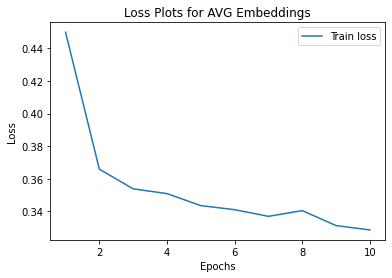

In [24]:
from matplotlib import pyplot as plt
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), avg_train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots for AVG Embeddings")
plt.legend(loc='upper right')
plt.show()

In [25]:
correct = 0
total = 0
y_pred_avg_NN = []

with torch.no_grad():
    for i, batch in enumerate(avgtestloader,0):
        inputs = batch['text']
        labels = batch['label']
        outputs = avgnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.reshape(-1)).sum()
        y_pred_avg_NN = np.append(y_pred_avg_NN, predicted.numpy())

print(correct)
print(total)
print('Accuracy of the network for avg_emb after training: %.2f %%' % (
    100 * correct / total))

tensor(21283)
25000
Accuracy of the network for avg_emb after training: 85.13 %


In [26]:
clsnet = Net()
clsoptimizer = optim.Adam(clsnet.parameters(), lr=0.001)

In [27]:
correct = 0
total = 0

with torch.no_grad():
    for i, batch in enumerate(clstestloader,0):
        inputs = batch['text']
        labels = batch['label']
        outputs = clsnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.reshape(-1)).sum()

print(correct)
print(total)
print('Accuracy of the network for cls_emb_test before training: %.2f %%' % (100 * correct / total))

tensor(12423)
25000
Accuracy of the network for cls_emb_test before training: 49.69 %


In [28]:
torch.manual_seed(77)
overall_step = 0
epochs = 25
train_loss = []

print('Started training for cls_emb.')

for epoch in range(epochs):
    running_loss = 0
    accuracy=0

    for i, batch in enumerate(clstrainloader,0):
        inputs = batch['text']
        labels = batch['label']

        clsoptimizer.zero_grad()
        outputs = clsnet(inputs)       
        loss = criterion(outputs, torch.max(labels, 1)[0].long())

        with torch.no_grad():
            _, predicted = torch.max(outputs.data, 1)
            accuracy += (predicted == labels.reshape(-1)).sum()

        loss.backward()
        clsoptimizer.step()

        running_loss += loss.item()
    train_loss.append(running_loss/200)    
    print('Epoch: %d, loss: %.3f, acc: %.3f' % (epoch + 1, running_loss / 200, accuracy/200))      
print('Finished training for cls_emb.')

Started training for cls_emb.
Epoch: 1, loss: 0.475, acc: 76.885
Epoch: 2, loss: 0.389, acc: 82.465
Epoch: 3, loss: 0.373, acc: 83.045
Epoch: 4, loss: 0.371, acc: 83.085
Epoch: 5, loss: 0.370, acc: 83.325
Epoch: 6, loss: 0.360, acc: 84.040
Epoch: 7, loss: 0.365, acc: 83.605
Epoch: 8, loss: 0.352, acc: 84.190
Epoch: 9, loss: 0.358, acc: 83.685
Epoch: 10, loss: 0.349, acc: 84.360
Epoch: 11, loss: 0.345, acc: 84.580
Epoch: 12, loss: 0.346, acc: 84.485
Epoch: 13, loss: 0.339, acc: 84.980
Epoch: 14, loss: 0.335, acc: 85.100
Epoch: 15, loss: 0.332, acc: 84.930
Epoch: 16, loss: 0.331, acc: 85.025
Epoch: 17, loss: 0.332, acc: 84.910
Epoch: 18, loss: 0.322, acc: 85.840
Epoch: 19, loss: 0.316, acc: 86.140
Epoch: 20, loss: 0.316, acc: 86.000
Epoch: 21, loss: 0.308, acc: 86.525
Epoch: 22, loss: 0.305, acc: 86.510
Epoch: 23, loss: 0.305, acc: 86.590
Epoch: 24, loss: 0.299, acc: 86.970
Epoch: 25, loss: 0.295, acc: 87.275
Finished training for cls_emb.


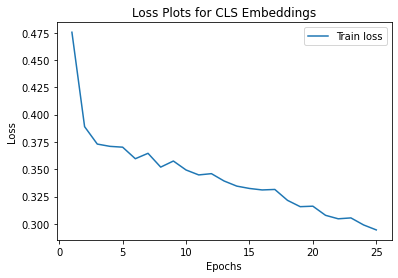

In [29]:
from matplotlib import pyplot as plt
fig=plt.figure()
plt.plot(np.arange(1, epochs+1), train_loss, label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots for CLS Embeddings")
plt.legend(loc='upper right')
plt.show()

In [30]:
correct = 0
total = 0
y_pred_cls_NN = []

with torch.no_grad():
    for i, batch in enumerate(clstestloader,0):
        inputs = batch['text']
        labels = batch['label']
        outputs = clsnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.reshape(-1)).sum()
        y_pred_cls_NN = np.append(y_pred_cls_NN, predicted.numpy())

print(correct)
print(total)
print('Accuracy of the network for cls_emb after training: %.2f %%' % (100 * correct / total))

tensor(20952)
25000
Accuracy of the network for cls_emb after training: 83.81 %


In [51]:
import statistics
from statistics import mode

def majority(List):
    return(mode(List))

def EnsembleMajority(y_pred_avg_NN, y_pred_avg_log, y_pred_avg_svm):
    final_pred = y_pred_avg_log
    for i in range(len(y_pred_avg_log)): 
        List = [y_pred_avg_NN[i], y_pred_avg_log[i], y_pred_cls_log[i]]
        final_pred[i] = (majority(List))

    score = accuracy_score(final_pred, gold_test.reshape(-1))
    return score

In [52]:
ensemble_majority_acc = EnsembleMajority(y_pred_avg_NN, y_pred_avg_log, y_pred_avg_svm)
print('Accuracy of the network for avg_emb after training: %.2f %%' % (ensemble_majority_acc*100))

Accuracy of the network for avg_emb after training: 85.00 %


In [53]:
ensemble_majority_acc = EnsembleMajority(y_pred_cls_NN, y_pred_cls_log, y_pred_cls_svm)
print('Accuracy of the network for cls_emb after training: %.2f %%' % (ensemble_majority_acc*100))

Accuracy of the network for cls_emb after training: 84.42 %
